# Text Analytics - Visualization

Importing required Libraries

In [97]:
import nltk

In [98]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [101]:
!pip install wordcloud

In [102]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [103]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re, string, unicodedata


Getting the Independence day speech data

In [230]:
#National Day speech
from urllib.request import urlopen
response = urlopen('https://www.news18.com/news/india/independence-day-full-text-of-narendra-modis-red-fort-speech-2271575.html')
html = response.read()
print(len(html))


268173


Data Pre-processing
Noise Removal

In [231]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



In [232]:
html = denoise_text(html)
print(html)


Independence Day: Full Text of Narendra Modi's Red Fort Speech - News18



{ "@context": "https://schema.org","@type": "WebPage","name": "Independence Day: Full Text of Narendra Modi's Red Fort Speech","description": "This was Prime Minister Narendra Modi's sixth straight independence day speech. ","keywords":"Article 370, BJP, floods, jammu and kashmir, Kashmir, ladakh, Narendra Modi, prime minister, prime minister narendra modi, Raksha Bandhan, Red Fort","url" : "https://www.news18.com/news/india/independence-day-full-text-of-narendra-modis-red-fort-speech-2271575.html"}{"@context": "https://schema.org","@type": "NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.news18.com/news/india/independence-day-full-text-of-narendra-modis-red-fort-speech-2271575.html","description": "This was Prime Minister Narendra Modi's sixth straight independence day speech. ","thumbnailUrl": "https://images.news18.com/ibnlive/uploads/2019/08/modi-5.jpg"},"headline": "Independence Day: 

In [233]:
html

'\nIndependence Day: Full Text of Narendra Modi\'s Red Fort Speech - News18\n\n\n\n{ "@context": "https://schema.org","@type": "WebPage","name": "Independence Day: Full Text of Narendra Modi\'s Red Fort Speech","description": "This was Prime Minister Narendra Modi\'s sixth straight independence day speech. ","keywords":"Article 370, BJP, floods, jammu and kashmir, Kashmir, ladakh, Narendra Modi, prime minister, prime minister narendra modi, Raksha Bandhan, Red Fort","url" : "https://www.news18.com/news/india/independence-day-full-text-of-narendra-modis-red-fort-speech-2271575.html"}{"@context": "https://schema.org","@type": "NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.news18.com/news/india/independence-day-full-text-of-narendra-modis-red-fort-speech-2271575.html","description": "This was Prime Minister Narendra Modi\'s sixth straight independence day speech. ","thumbnailUrl": "https://images.news18.com/ibnlive/uploads/2019/08/modi-5.jpg"},"headline": "Independ

In [234]:
#Get the token
tokens = [tok for tok in html.split()]

In [235]:
tokens

['Independence',
 'Day:',
 'Full',
 'Text',
 'of',
 'Narendra',
 "Modi's",
 'Red',
 'Fort',
 'Speech',
 '-',
 'News18',
 '{',
 '"@context":',
 '"https://schema.org","@type":',
 '"WebPage","name":',
 '"Independence',
 'Day:',
 'Full',
 'Text',
 'of',
 'Narendra',
 "Modi's",
 'Red',
 'Fort',
 'Speech","description":',
 '"This',
 'was',
 'Prime',
 'Minister',
 'Narendra',
 "Modi's",
 'sixth',
 'straight',
 'independence',
 'day',
 'speech.',
 '","keywords":"Article',
 '370,',
 'BJP,',
 'floods,',
 'jammu',
 'and',
 'kashmir,',
 'Kashmir,',
 'ladakh,',
 'Narendra',
 'Modi,',
 'prime',
 'minister,',
 'prime',
 'minister',
 'narendra',
 'modi,',
 'Raksha',
 'Bandhan,',
 'Red',
 'Fort","url"',
 ':',
 '"https://www.news18.com/news/india/independence-day-full-text-of-narendra-modis-red-fort-speech-2271575.html"}{"@context":',
 '"https://schema.org","@type":',
 '"NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.news18.com/news/india/independence-day-full-text-of-narendra-mod

Data Normalization
Stemming and Lemmatization

In [236]:
#Stemming
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [237]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [238]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [239]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [240]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [241]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    return words

In [242]:
words = normalize(tokens)
print(words)

['independence', 'day', 'full', 'text', 'of', 'narendra', 'modis', 'red', 'fort', 'speech', 'news18', 'context', 'httpsschemaorgtype', 'webpagename', 'independence', 'day', 'full', 'text', 'of', 'narendra', 'modis', 'red', 'fort', 'speechdescription', 'this', 'was', 'prime', 'minister', 'narendra', 'modis', 'sixth', 'straight', 'independence', 'day', 'speech', 'keywordsarticle', '370', 'bjp', 'floods', 'jammu', 'and', 'kashmir', 'kashmir', 'ladakh', 'narendra', 'modi', 'prime', 'minister', 'prime', 'minister', 'narendra', 'modi', 'raksha', 'bandhan', 'red', 'forturl', 'httpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmlcontext', 'httpsschemaorgtype', 'newsarticlemainentityofpagetypewebpageidhttpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmldescription', 'this', 'was', 'prime', 'minister', 'narendra', 'modis', 'sixth', 'straight', 'independence', 'day', 'speech', 'thumbnailurl', 'httpsimagesnews18comibnliveupload

In [243]:
words = lemmatize_verbs(words)
print(words)

['independence', 'day', 'full', 'text', 'of', 'narendra', 'modis', 'red', 'fort', 'speech', 'news18', 'context', 'httpsschemaorgtype', 'webpagename', 'independence', 'day', 'full', 'text', 'of', 'narendra', 'modis', 'red', 'fort', 'speechdescription', 'this', 'be', 'prime', 'minister', 'narendra', 'modis', 'sixth', 'straight', 'independence', 'day', 'speech', 'keywordsarticle', '370', 'bjp', 'flood', 'jammu', 'and', 'kashmir', 'kashmir', 'ladakh', 'narendra', 'modi', 'prime', 'minister', 'prime', 'minister', 'narendra', 'modi', 'raksha', 'bandhan', 'red', 'forturl', 'httpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmlcontext', 'httpsschemaorgtype', 'newsarticlemainentityofpagetypewebpageidhttpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmldescription', 'this', 'be', 'prime', 'minister', 'narendra', 'modis', 'sixth', 'straight', 'independence', 'day', 'speech', 'thumbnailurl', 'httpsimagesnews18comibnliveuploads20

In [244]:
words = stem_words(words)
print(words)

['independ', 'day', 'ful', 'text', 'of', 'narendr', 'mod', 'red', 'fort', 'speech', 'news18', 'context', 'httpsschemaorgtype', 'webpagenam', 'independ', 'day', 'ful', 'text', 'of', 'narendr', 'mod', 'red', 'fort', 'speechdescrib', 'thi', 'be', 'prim', 'min', 'narendr', 'mod', 'six', 'straight', 'independ', 'day', 'speech', 'keywordsartic', '370', 'bjp', 'flood', 'jammu', 'and', 'kashmir', 'kashmir', 'ladakh', 'narendr', 'mod', 'prim', 'min', 'prim', 'min', 'narendr', 'mod', 'raksh', 'bandh', 'red', 'forturl', 'httpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmlcontext', 'httpsschemaorgtype', 'newsarticlemainentityofpagetypewebpageidhttpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmldescription', 'thi', 'be', 'prim', 'min', 'narendr', 'mod', 'six', 'straight', 'independ', 'day', 'speech', 'thumbnailurl', 'httpsimagesnews18comibnliveuploads201908modi5jpgheadline', 'independ', 'day', 'ful', 'text', 'of', 'narendr', 

Stopword removal

In [245]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [246]:
words = remove_stopwords(words)
print(words)

['independ', 'day', 'ful', 'text', 'narendr', 'mod', 'red', 'fort', 'speech', 'news18', 'context', 'httpsschemaorgtype', 'webpagenam', 'independ', 'day', 'ful', 'text', 'narendr', 'mod', 'red', 'fort', 'speechdescrib', 'thi', 'prim', 'min', 'narendr', 'mod', 'six', 'straight', 'independ', 'day', 'speech', 'keywordsartic', '370', 'bjp', 'flood', 'jammu', 'kashmir', 'kashmir', 'ladakh', 'narendr', 'mod', 'prim', 'min', 'prim', 'min', 'narendr', 'mod', 'raksh', 'bandh', 'red', 'forturl', 'httpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmlcontext', 'httpsschemaorgtype', 'newsarticlemainentityofpagetypewebpageidhttpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmldescription', 'thi', 'prim', 'min', 'narendr', 'mod', 'six', 'straight', 'independ', 'day', 'speech', 'thumbnailurl', 'httpsimagesnews18comibnliveuploads201908modi5jpgheadline', 'independ', 'day', 'ful', 'text', 'narendr', 'mod', 'red', 'fort', 'speecharticleb

Getting the frequency of words

In [247]:
words

['independ',
 'day',
 'ful',
 'text',
 'narendr',
 'mod',
 'red',
 'fort',
 'speech',
 'news18',
 'context',
 'httpsschemaorgtype',
 'webpagenam',
 'independ',
 'day',
 'ful',
 'text',
 'narendr',
 'mod',
 'red',
 'fort',
 'speechdescrib',
 'thi',
 'prim',
 'min',
 'narendr',
 'mod',
 'six',
 'straight',
 'independ',
 'day',
 'speech',
 'keywordsartic',
 '370',
 'bjp',
 'flood',
 'jammu',
 'kashmir',
 'kashmir',
 'ladakh',
 'narendr',
 'mod',
 'prim',
 'min',
 'prim',
 'min',
 'narendr',
 'mod',
 'raksh',
 'bandh',
 'red',
 'forturl',
 'httpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmlcontext',
 'httpsschemaorgtype',
 'newsarticlemainentityofpagetypewebpageidhttpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmldescription',
 'thi',
 'prim',
 'min',
 'narendr',
 'mod',
 'six',
 'straight',
 'independ',
 'day',
 'speech',
 'thumbnailurl',
 'httpsimagesnews18comibnliveuploads201908modi5jpgheadline',
 'independ',
 'd

Wrod frequency

In [248]:
def wordfreq (words):
    """Function to generated the frequency distribution of the
given text"""
    word_freq={}
    for tok in words:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
    return word_freq

In [249]:
new_tokens = wordfreq(words)

In [250]:
new_tokens

{'independ': 75,
 'day': 52,
 'ful': 19,
 'text': 9,
 'narendr': 20,
 'mod': 23,
 'red': 31,
 'fort': 28,
 'speech': 16,
 'news18': 8,
 'context': 1,
 'httpsschemaorgtype': 3,
 'webpagenam': 1,
 'speechdescrib': 1,
 'thi': 205,
 'prim': 16,
 'min': 23,
 'six': 7,
 'straight': 7,
 'keywordsartic': 2,
 '370': 16,
 'bjp': 2,
 'flood': 4,
 'jammu': 16,
 'kashmir': 19,
 'ladakh': 6,
 'raksh': 4,
 'bandh': 4,
 'forturl': 1,
 'httpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmlcontext': 1,
 'newsarticlemainentityofpagetypewebpageidhttpswwwnews18comnewsindiaindependencedayfulltextofnarendramodisredfortspeech2271575htmldescription': 1,
 'thumbnailurl': 1,
 'httpsimagesnews18comibnliveuploads201908modi5jpgheadline': 1,
 'speecharticlebodyprim': 1,
 'thursday': 2,
 'del': 6,
 'wher': 22,
 'touch': 2,
 'upon': 2,
 'vary': 7,
 'issu': 5,
 'includ': 2,
 'government039s': 1,
 'decid': 38,
 'pm': 3,
 'modi039s': 2,
 'dear': 34,
 'countrym': 70,
 'holy': 8,
 'many':

<FreqDist with 2988 samples and 14474 outcomes>
[('hav', 459), ('country', 253), ('thi', 205), ('wil', 205), ('var', 134), ('also', 130), ('ther', 127), ('us', 115), ('ind', 101), ('year', 101), ('today', 96), ('com', 95), ('al', 91), ('go', 91), ('dream', 88), ('get', 85), ('giv', 82), ('new', 81), ('world', 81), ('peopl', 78), ('govern', 77), ('independ', 75), ('tim', 71), ('countrym', 70), ('tak', 70)]


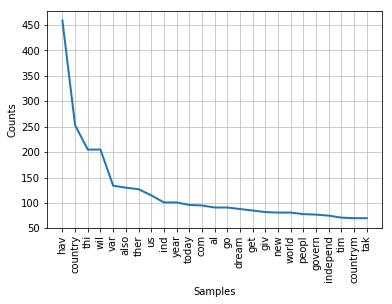

In [251]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(new_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

wordcloud

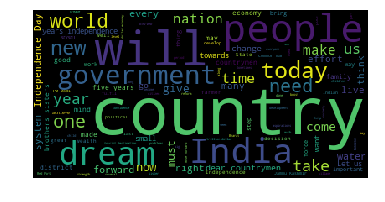

In [252]:
plot_wordcloud(wordcloud)